# Importing libraries

In [326]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Sinh các sample $X_i$

In [327]:
n_samples = 10000
u = np.array([0, 0, 0])
Z = np.identity(3)

#np.random.seed(0) #Cố định samples
X = np.random.multivariate_normal(u, Z, n_samples)
X

array([[ 0.06296419, -1.0650614 ,  0.26832963],
       [-0.44281347, -1.08061962, -0.16967666],
       [-0.47783795,  0.70208387,  1.98565131],
       ...,
       [-1.93977612, -0.29132203, -0.1310345 ],
       [-0.51536132, -0.04030505,  0.08367454],
       [-0.75535962, -0.13630708, -0.38628913]])

# Kiểm định giả thuyết $u_2 = 0$
### $T = x_2 = (0, 1, 0)^T\times X$
### $T$ ~ $N((0, 0, 0)^T\times u, (0, 1, 0)^T\times Z\times (0, 1, 0))$
### $(0, 0, 0)^T\times u = 0$
### $(0, 1, 0)^T\times Z\times (0, 1, 0) = 1$
### => $T$ ~ $N(0, 1)$
### z_score $= (T - 0) / 1 = T$

In [328]:
T = X[:, 1]
T

array([-1.0650614 , -1.08061962,  0.70208387, ..., -0.29132203,
       -0.04030505, -0.13630708])

In [329]:
p_values = (1 - stats.norm.cdf(T))
p_values

array([0.85657593, 0.86006682, 0.24131343, ..., 0.61459748, 0.51607504,
       0.55421074])

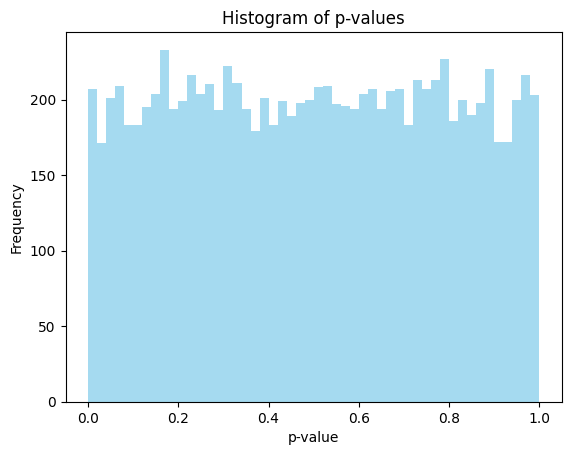

In [330]:
plt.hist(p_values, bins=50, alpha=0.75, color='skyblue')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Histogram of p-values')
plt.show()

In [331]:
ks_stat, ks_p_value = stats.kstest(p_values, "uniform", alternative='two-sided')
print(f"Kolmogorov-Smirnov test statistic: {ks_stat}")
print(f"p-value of the KS test: {ks_p_value}")

Kolmogorov-Smirnov test statistic: 0.005993104905416269
p-value of the KS test: 0.8630002542014712


# ks_p_value $> 0.05 =>$ p_values uniform $=> u_2 = 0$